# Feature Engineering Intro


## Categorical Features

In [3]:
data = [
    {"price": 850000, "rooms": 4, "neighborhood": "Queen Anne"},
    {"price": 700000, "rooms": 3, "neighborhood": "Fremont"},
    {"price": 650000, "rooms": 3, "neighborhood": "Wallingford"},
    {"price": 600000, "rooms": 2, "neighborhood": "Fremont"},
]

In [4]:
{"Queen Anne": 1, "Fremont": 2, "Wallingford": 3};

In [5]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [6]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [7]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

In [6]:
sample = ["problem of evil", "evil queen", "horizon problem"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [8]:
import pandas as pd

pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Image Features

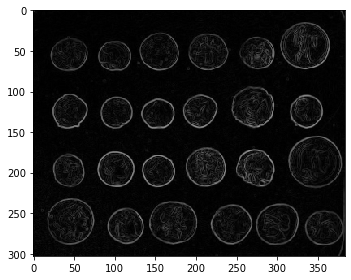

In [12]:
from skimage import data, io, filters

image = data.coins()
# ... or any other NumPy array!
edges = filters.sobel(image)
io.imshow(edges)
io.show()

## Derived Features

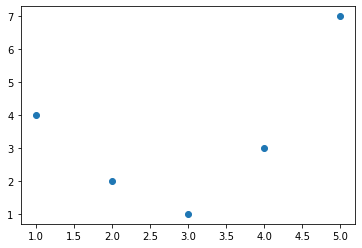

In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

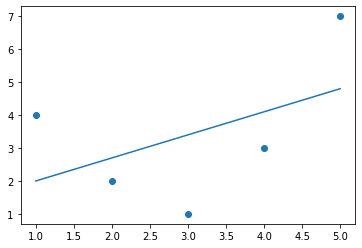

In [14]:
from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

In [15]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


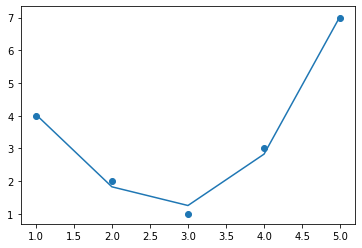

In [16]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputation of Missing Data

In [17]:
from numpy import nan

X = np.array([[nan, 0, 3], [3, 7, 9], [3, 5, 2], [4, nan, 6], [8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

In [19]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [20]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

In [22]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    SimpleImputer(strategy="mean"), PolynomialFeatures(degree=2), LinearRegression()
)

In [23]:
model.fit(X, y)  # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


## Example 1

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline
import seaborn as sns

In [28]:
pd.set_option("display.max_columns", None)
data_train = pd.read_excel("Data_Train.xlsx")
data_test = pd.read_excel("Data_Test.xlsx")

In [29]:
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [30]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [32]:
big_df = data_train.append(data_train, sort=False)

In [33]:
big_df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [34]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Feature Engineering

In [35]:
big_df["Date"] = big_df["Date_of_Journey"].str.split("/").str[0]
big_df["Month"] = big_df["Date_of_Journey"].str.split("/").str[1]
big_df["Year"] = big_df["Date_of_Journey"].str.split("/").str[2]

In [36]:
big_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [37]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date               object
Month              object
Year               object
dtype: object

In [38]:
big_df["Date"] = big_df["Date"].astype(int)
big_df["Month"] = big_df["Month"].astype(int)
big_df["Year"] = big_df["Year"].astype(int)

In [39]:
big_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
dtype: object

In [40]:
big_df = big_df.drop(["Date_of_Journey"], axis=1)

In [41]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [42]:
big_df["Arrival_Time"] = big_df["Arrival_Time"].str.split(" ").str[0]

In [43]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [44]:
big_df[big_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480,6,5,2019


In [45]:
big_df["Total_Stops"] = big_df["Total_Stops"].fillna("1 stop")

In [46]:
big_df["Total_Stops"] = big_df["Total_Stops"].replace("non-stop", "0 stop")

In [47]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [48]:
big_df["Stop"] = big_df["Total_Stops"].str.split(" ").str[0]

In [49]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0 stop,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,1


In [50]:
big_df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
Date                int32
Month               int32
Year                int32
Stop               object
dtype: object

In [51]:
big_df["Stop"] = big_df["Stop"].astype(int)
big_df = big_df.drop(["Total_Stops"], axis=1)

In [52]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,No info,3897,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,No info,7662,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,No info,13882,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,No info,6218,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,No info,13302,1,3,2019,1


In [53]:
big_df["Arrival_Hour"] = big_df["Arrival_Time"].str.split(":").str[0]
big_df["Arrival_Minute"] = big_df["Arrival_Time"].str.split(":").str[1]

In [54]:
big_df["Arrival_Hour"] = big_df["Arrival_Hour"].astype(int)
big_df["Arrival_Minute"] = big_df["Arrival_Minute"].astype(int)
big_df = big_df.drop(["Arrival_Time"], axis=1)

In [55]:
big_df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,No info,3897,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,No info,7662,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,No info,13882,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,No info,6218,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,No info,13302,1,3,2019,1,21,35


In [56]:
big_df["Departure_Hour"] = big_df["Dep_Time"].str.split(":").str[0]
big_df["Departure_Minute"] = big_df["Dep_Time"].str.split(":").str[1]

In [57]:
big_df["Departure_Hour"] = big_df["Departure_Hour"].astype(int)
big_df["Departure_Minute"] = big_df["Departure_Minute"].astype(int)
big_df = big_df.drop(["Dep_Time"], axis=1)

In [58]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50


In [59]:
big_df["Route_1"] = big_df["Route"].str.split("→ ").str[0]
big_df["Route_2"] = big_df["Route"].str.split("→ ").str[1]
big_df["Route_3"] = big_df["Route"].str.split("→ ").str[2]
big_df["Route_4"] = big_df["Route"].str.split("→ ").str[3]
big_df["Route_5"] = big_df["Route"].str.split("→ ").str[4]

In [60]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [61]:
big_df["Price"].fillna((big_df["Price"].mean()), inplace=True)

In [62]:
big_df["Route_1"].fillna("None", inplace=True)
big_df["Route_2"].fillna("None", inplace=True)
big_df["Route_3"].fillna("None", inplace=True)
big_df["Route_4"].fillna("None", inplace=True)
big_df["Route_5"].fillna("None", inplace=True)

In [63]:
big_df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [64]:
big_df = big_df.drop(["Route"], axis=1)
big_df = big_df.drop(["Duration"], axis=1)

In [65]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [66]:
big_df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [67]:
price_train = data_train.Price  # Concatenate training and test sets
data = pd.concat([data_train.drop(["Price"], axis=1), data_test])

In [69]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [70]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13354 non-null  object
 1   Date_of_Journey  13354 non-null  object
 2   Source           13354 non-null  object
 3   Destination      13354 non-null  object
 4   Route            13353 non-null  object
 5   Dep_Time         13354 non-null  object
 6   Arrival_Time     13354 non-null  object
 7   Duration         13354 non-null  object
 8   Total_Stops      13353 non-null  object
 9   Additional_Info  13354 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [73]:
data = data.drop_duplicates()

In [75]:
data = data.drop(data.loc[data["Route"].isnull()].index)

In [76]:
data["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

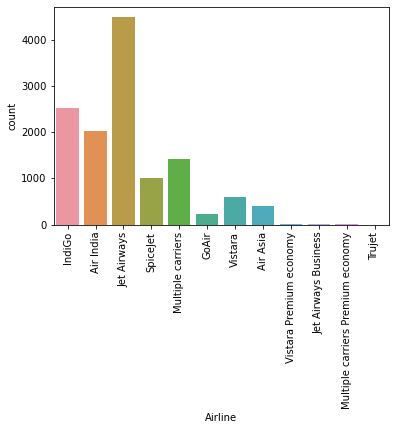

In [77]:
sns.countplot(x="Airline", data=data)
plt.xticks(rotation=90)

In [78]:
data["Airline"] = np.where(
    data["Airline"] == "Vistara Premium economy", "Vistara", data["Airline"]
)
data["Airline"] = np.where(
    data["Airline"] == "Jet Airways Business", "Jet Airways", data["Airline"]
)
data["Airline"] = np.where(
    data["Airline"] == "Multiple carriers Premium economy",
    "Multiple carriers",
    data["Airline"],
)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

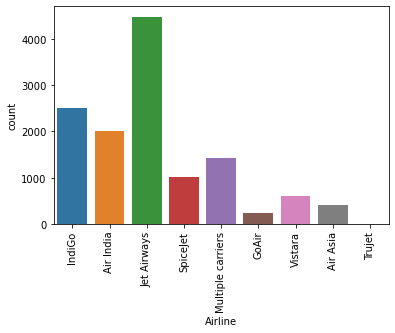

In [79]:
sns.countplot(x="Airline", data=data)
plt.xticks(rotation=90)

In [80]:
data["Destination"].unique()
data["Destination"] = np.where(
    data["Destination"] == "Delhi", "New Delhi", data["Destination"]
)

In [81]:
data["Date_of_Journey"]

0       24/03/2019
1        1/05/2019
2        9/06/2019
3       12/05/2019
4       01/03/2019
           ...    
2666     6/06/2019
2667    27/03/2019
2668     6/03/2019
2669     6/03/2019
2670    15/06/2019
Name: Date_of_Journey, Length: 12703, dtype: object

In [82]:
data["Date_of_Journey"] = pd.to_datetime(data["Date_of_Journey"])

In [83]:
data["day_of_week"] = data["Date_of_Journey"].dt.day_name()

In [84]:
print(data["Date_of_Journey"])
print(data["day_of_week"])

0      2019-03-24
1      2019-01-05
2      2019-09-06
3      2019-12-05
4      2019-01-03
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 12703, dtype: datetime64[ns]
0          Sunday
1        Saturday
2          Friday
3        Thursday
4        Thursday
          ...    
2666     Thursday
2667    Wednesday
2668       Monday
2669       Monday
2670     Saturday
Name: day_of_week, Length: 12703, dtype: object


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 <a list of 40 Text major ticklabel objects>)

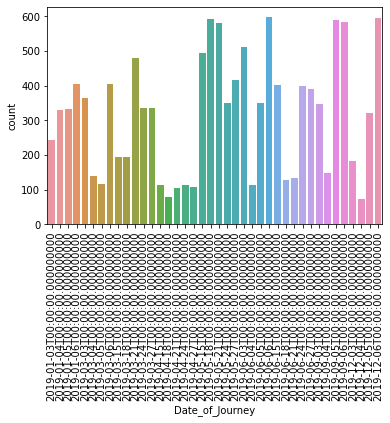

In [85]:
sns.countplot(x="Date_of_Journey", data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

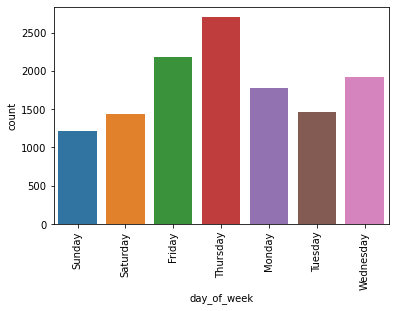

In [86]:
sns.countplot(x="day_of_week", data=data)
plt.xticks(rotation=90)

In [87]:
data["Journey_Month"] = pd.to_datetime(
    data.Date_of_Journey, format="%d/%m/%Y"
).dt.month_name()

In [88]:
print(data["Journey_Month"])

0           March
1         January
2       September
3        December
4         January
          ...    
2666         June
2667        March
2668         June
2669         June
2670         June
Name: Journey_Month, Length: 12703, dtype: object


(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

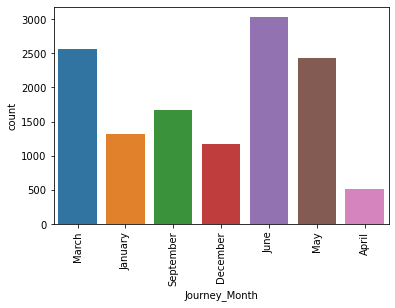

In [89]:
sns.countplot(x="Journey_Month", data=data)
plt.xticks(rotation=90)

In [90]:
data["Departure_t"] = pd.to_datetime(data.Dep_Time, format="%H:%M")
a = data.assign(
    dept_session=pd.cut(
        data.Departure_t.dt.hour,
        [0, 6, 12, 18, 24],
        labels=["Night", "Morning", "Afternoon", "Evening"],
    )
)
data["Departure_S"] = a["dept_session"]

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

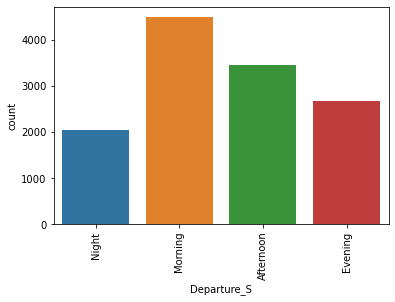

In [92]:
sns.countplot(x="Departure_S", data=data)
plt.xticks(rotation=90)

In [114]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
big_df["Airline"] = encoder.fit_transform(big_df["Airline"])
big_df["Source"] = encoder.fit_transform(big_df["Source"])
big_df["Destination"] = encoder.fit_transform(big_df["Destination"])
big_df["Additional_Info"] = encoder.fit_transform(big_df["Additional_Info"])
big_df["Route_1"] = encoder.fit_transform(big_df["Route_1"])
big_df["Route_2"] = encoder.fit_transform(big_df["Route_2"])
big_df["Route_3"] = encoder.fit_transform(big_df["Route_3"])
big_df["Route_4"] = encoder.fit_transform(big_df["Route_4"])
big_df["Route_5"] = encoder.fit_transform(big_df["Route_5"])

In [115]:
big_df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897,24,3,2019,0,1,10,22,20,0,13,24,12,4
1,1,3,0,8,7662,1,5,2019,2,13,15,5,50,2,25,1,3,4
2,4,2,1,8,13882,9,6,2019,2,4,25,9,25,3,32,4,5,4
3,3,3,0,8,6218,12,5,2019,1,23,30,18,5,2,34,3,12,4
4,3,0,5,8,13302,1,3,2019,1,21,35,16,50,0,34,8,12,4


### Feature Selection

In [116]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [117]:
df_train = big_df[0:10683]
df_test = big_df[10683:]

In [118]:
X = df_train.drop(["Price"], axis=1)
y = df_train.Price

In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [120]:
model = SelectFromModel(Lasso(alpha=0.005, random_state=0))

In [121]:
model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [122]:
model.get_support()

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [123]:
selected_features = X_train.columns[(model.get_support())]

In [124]:
selected_features

Index(['Airline', 'Source', 'Destination', 'Additional_Info', 'Date', 'Month',
       'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Departure_Hour',
       'Departure_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [125]:
X_train = X_train.drop(["Year"], axis=1)

In [126]:
X_test = X_test.drop(["Year"], axis=1)

### RandomForestRegressor

In [127]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]
# Number of features to consider at every split
max_features = ["auto", "sqrt"]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [128]:
# Create the random grid
random_grid = {
    "n_estimators": n_estimators,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [129]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

In [130]:
# Random search of parameters, using 3 fold cross validation,
# search across 50 different combinations
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    scoring="neg_mean_squared_error",
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=1,
)

In [131]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.4s
[CV] n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5 
[CV]  n_estimators=400, min_samples_split=100, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=20, total=   4.9s
[CV] n_estimators=200, min_samples_spl

[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.1s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=10, total=   6.2s
[CV] n_estimators=100, mi

[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.3s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  15.1s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.4s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=10, total=  12.0s
[CV] n_estimators=1200, min_samples_split=100, min_s

[CV]  n_estimators=1200, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   9.6s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   2.2s
[CV] n_estimators=300, min_samples_split=

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   8.8s
[CV] n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=20, total=   9.8s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   7.2s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.3s
[CV] n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25 
[CV]  n_estimators=900, min_samples_split=10, min_samples_leaf=10, max_features=sqrt, max_depth=25, total=   6.0s
[CV] n_estimators=900, min_samples_split

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  10.1s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=  10.6s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=30, total=   8.9s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   4.8s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.0s
[CV] n_estimators=600, min_samples_split=10

[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   4.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=5, total=   3.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=1, max_features=sqrt, max_depth=30, total=   5.1s
[CV] n_estimators=900, min_samples_split=

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 26.3min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [132]:
y_pred = rf_random.predict(X_test)

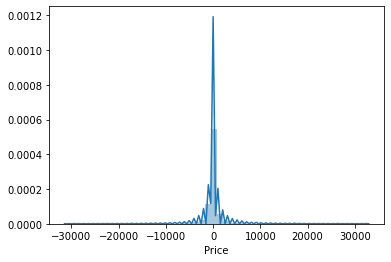

In [133]:
sns.distplot(y_test - y_pred)

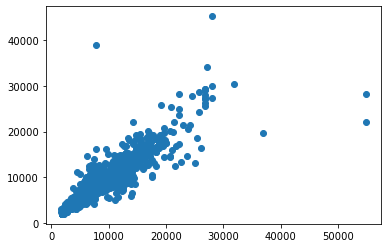

In [134]:
plt.scatter(y_test, y_pred)

## Example 2

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


loan_demographics = pd.read_csv("traindemographics.csv")
loan_prev = pd.read_csv("trainprevloans.csv")
loan_perf = pd.read_csv("trainperf.csv")

# load logistics dataset
sendy_data = pd.read_csv("sendy_logistics.csv")

In [9]:
loan_demographics.sample(3).T

,4057,3176,857
customerid,8a858fd1572b90090157371452df3711,8a858fc15b68ba6a015b77dc3edd5df5,8a858e1d5cd58f9e015cd8c747ad7d06
birthdate,1986-07-10 00:00:00.000000,1986-05-10 00:00:00.000000,1991-03-04 00:00:00.000000
bank_account_type,Savings,Savings,Savings
longitude_gps,7.57331,3.40489,4.55454
latitude_gps,9.00459,6.57699,8.55245
bank_name_clients,Diamond Bank,Access Bank,Access Bank
bank_branch_clients,NaN,NaN,NaN
employment_status_clients,Permanent,Permanent,Permanent
level_of_education_clients,NaN,NaN,NaN


In [10]:
loan_perf.sample(3).T

,3681,3256,3086
customerid,8a858fec5b5c994b015b5cba37c61d51,8a858e475c127bce015c15e434622bde,8a858fb65b2020b2015b23c6042023b2
systemloanid,301993525,301975900,301964529
loannumber,3,3,7
approveddate,2017-07-24 14:34:46.000000,2017-07-13 11:37:00.000000,2017-07-05 10:19:24.000000
creationdate,2017-07-24 13:34:32.000000,2017-07-13 10:36:54.000000,2017-07-05 09:19:09.000000
loanamount,10000,10000,30000
totaldue,13000,13000,34500
termdays,30,30,30
referredby,NaN,8a858edb5bd936e4015bdf8a95d7656a,NaN
good_bad_flag,Good,Bad,Good


In [11]:
loan_prev.sample(3).T

,6252,17518,13500
Unnamed: 0,6252,17518,13500
customerid,8a858953548fb0c001549b2149246862,8a858f2f54e28d530154e3ead3e95ce9,8a858f065b1fe50a015b20ca1b6776de
systemloanid,301927902,301813303,301943796
loannumber,7,5,6
approveddate,2017-06-05 16:39:38.000000,2017-02-09 09:41:41.000000,2017-06-19 15:30:42.000000
creationdate,2017-06-05 15:39:31.000000,2017-02-09 08:41:28.000000,2017-06-19 14:30:36.000000
loanamount,30000,30000,20000
totaldue,34500,36800,24500
termdays,30,60,30
closeddate,2017-06-30 09:30:22.000000,2017-03-02 05:10:27.000000,2017-07-17 16:05:51.000000


In [12]:
sendy_data.sample(3).T

,5308,10835,17329
Order No,Order_No_16373,Order_No_22509,Order_No_266
User Id,User_Id_3194,User_Id_1392,User_Id_1502
Vehicle Type,Bike,Bike,Bike
Platform Type,3,3,3
Personal or Business,Business,Business,Business
Placement - Day of Month,29,13,31
Placement - Weekday (Mo = 1),3,3,1
Placement - Time,11:04:02 AM,10:00:51 AM,10:34:15 AM
Confirmation - Day of Month,29,13,31
Confirmation - Weekday (Mo = 1),3,3,1


In [13]:
# Fill categorical
print("shape of loan_demographic is {}".format(loan_demographics.shape))
loan_demographics.isna().sum()

shape of loan_demographic is (4346, 9)


customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients      648
level_of_education_clients    3759
dtype: int64

In [14]:
loan_demographics["employment_status_clients"].value_counts()

Permanent        3146
Self-Employed     348
Student           142
Unemployed         57
Retired             4
Contract            1
Name: employment_status_clients, dtype: int64

In [15]:
# fill with mode (Permanent)
loan_demographics["employment_status_clients"] = loan_demographics[
    "employment_status_clients"
].fillna(value="Permanent")
loan_demographics.isna().sum()

customerid                       0
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           4295
employment_status_clients        0
level_of_education_clients    3759
dtype: int64

In [16]:
sendy_data.isna().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [17]:
mean_df = round(sendy_data["Temperature"].mean())
mode_df = round(sendy_data["Temperature"].mode()[0])
median_df = round(sendy_data["Temperature"].median())

# Fill with mean
print("Filling with mean value of {}".format(mean_df))
sendy_data["Temperature"] = sendy_data["Temperature"].fillna(mean_df)

# Fill with mode
print("Filling with modal value of {}".format(mode_df))
sendy_data["Temperature"] = sendy_data["Temperature"].fillna(mode_df)

# Fill with median
print("Filling with median value of {}".format(median_df))
sendy_data["Temperature"] = sendy_data["Temperature"].fillna(median_df)

Filling with mean value of 23
Filling with modal value of 25.0
Filling with median value of 24


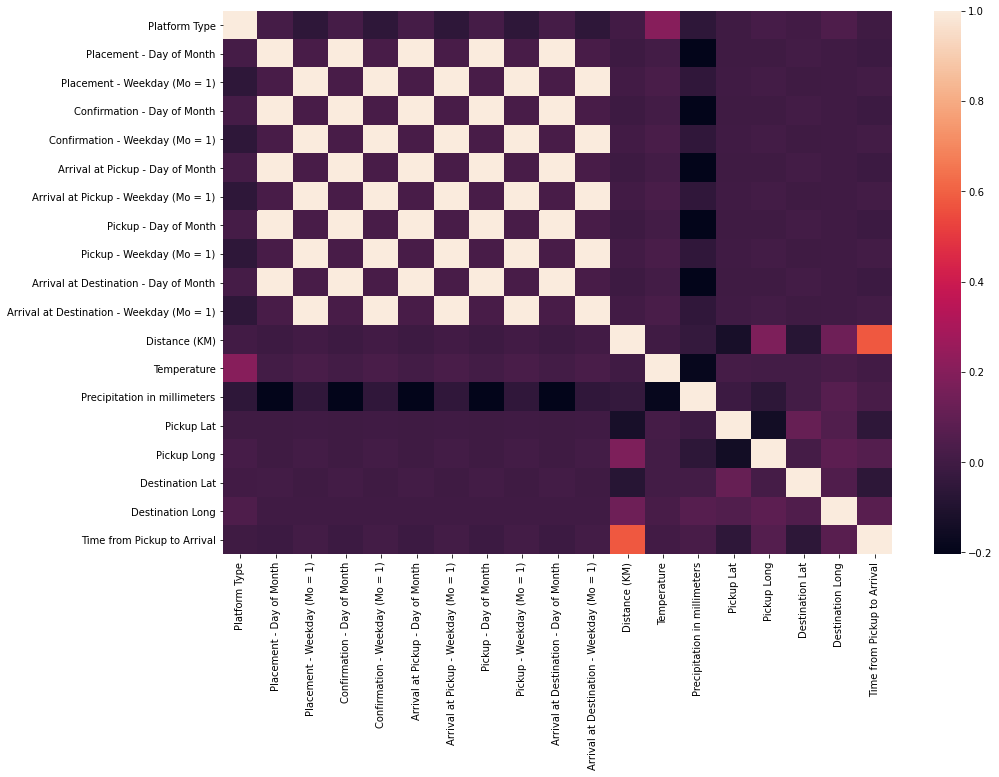

In [18]:
# get correlated values
plt.figure(figsize=(15, 10))
sns.heatmap(sendy_data.corr())

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

to_train = [
    "Precipitation in millimeters",
    "Destination Lat",
    "Destination Long",
    "Time from Pickup to Arrival",
]

temp_df = sendy_data[to_train]
# Step-1: Split the dataset that contains the missing values and no missing values as test and train respectively.
x_train = temp_df[temp_df["Precipitation in millimeters"].notnull()].drop(
    columns="Precipitation in millimeters"
)
y_train = temp_df[temp_df["Precipitation in millimeters"].notnull()][
    "Precipitation in millimeters"
]
x_test = temp_df[temp_df["Precipitation in millimeters"].isnull()].drop(
    columns="Precipitation in millimeters"
)


lr.fit(x_train, y_train)
pred = lr.predict(x_test)

print(np.round(pred, 5))

sendy_data["Precipitation in millimeters"][
    sendy_data["Precipitation in millimeters"].isnull()
] = pred

[8.03056 8.18609 7.86142 ... 8.46164 7.45028 8.60717]


In [20]:
# get the index of missing so we can some of the values used for filling
missing_indx = list(sendy_data["Temperature"][sendy_data["Temperature"].isna()].index)

In [21]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor

# Run imputer with a Random Forest estimator
imp = IterativeImputer(
    RandomForestRegressor(n_estimators=5), max_iter=5, random_state=1
)

to_train = [
    "Temperature",
    "Destination Lat",
    "Destination Long",
    "Time from Pickup to Arrival",
]
sendy_data[to_train] = pd.DataFrame(
    imp.fit_transform(sendy_data[to_train]), columns=to_train
)

In [22]:
sendy_data["Temperature"][missing_indx].head(10)

Series([], Name: Temperature, dtype: float64)

### categorical features

In [23]:
# The feature level_of_education is ordinal
loan_demographics["level_of_education_clients"].unique()

array([nan, 'Secondary', 'Graduate', 'Post-Graduate', 'Primary'],
      dtype=object)

In [24]:
# use a simple map function
map_education = {"Primary": 1, "Secondary": 2, "Graduate": 3, "Post-Graduate": 4}

loan_demographics["level_of_education_clients"] = loan_demographics[
    "level_of_education_clients"
].map(map_education)

loan_demographics["level_of_education_clients"].value_counts()

3.0    420
2.0     89
4.0     68
1.0     10
Name: level_of_education_clients, dtype: int64

In [25]:
# Check the number of unique classes
cat_cols = loan_demographics.select_dtypes(include="object").columns

for col in cat_cols:
    print("Number of classes in {}".format(col))
    print(loan_demographics[col].nunique())
    print("--------------------------")

Number of classes in customerid
4334
--------------------------
Number of classes in birthdate
3297
--------------------------
Number of classes in bank_account_type
3
--------------------------
Number of classes in bank_name_clients
18
--------------------------
Number of classes in bank_branch_clients
45
--------------------------
Number of classes in employment_status_clients
6
--------------------------


In [26]:
import category_encoders as ce

# Label encoding
cat_cols = ["bank_name_clients", "bank_branch_clients"]

encoder = ce.OrdinalEncoder(cols=cat_cols)
loan_demographics = encoder.fit_transform(loan_demographics)

In [27]:
loan_demographics.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
birthdate,1973-10-10 00:00:00.000000,1986-01-21 00:00:00.000000,1987-04-01 00:00:00.000000,1991-07-19 00:00:00.000000,1982-11-22 00:00:00.000000
bank_account_type,Savings,Savings,Savings,Savings,Savings
longitude_gps,3.31922,3.3256,5.7461,3.36285,8.45533
latitude_gps,6.5286,7.1194,5.56317,6.64249,11.9714
bank_name_clients,1,2,3,1,1
bank_branch_clients,1,1,1,1,1
employment_status_clients,Permanent,Permanent,Permanent,Permanent,Permanent
level_of_education_clients,NaN,NaN,NaN,NaN,NaN


In [28]:
cats = ["bank_account_type", "level_of_education_clients"]

one_hot_enc = ce.OneHotEncoder(cols=cats)
loan_demographics = one_hot_enc.fit_transform(loan_demographics)

In [29]:
loan_demographics.head().T

,0,1,2,3,4
customerid,8a858e135cb22031015cbafc76964ebd,8a858e275c7ea5ec015c82482d7c3996,8a858e5b5bd99460015bdc95cd485634,8a858efd5ca70688015cabd1f1e94b55,8a858e785acd3412015acd48f4920d04
birthdate,1973-10-10 00:00:00.000000,1986-01-21 00:00:00.000000,1987-04-01 00:00:00.000000,1991-07-19 00:00:00.000000,1982-11-22 00:00:00.000000
bank_account_type_1,1,1,1,1,1
bank_account_type_2,0,0,0,0,0
bank_account_type_3,0,0,0,0,0
longitude_gps,3.31922,3.3256,5.7461,3.36285,8.45533
latitude_gps,6.5286,7.1194,5.56317,6.64249,11.9714
bank_name_clients,1,2,3,1,1
bank_branch_clients,1,1,1,1,1
employment_status_clients,Permanent,Permanent,Permanent,Permanent,Permanent


In [30]:
cat_cols = ["bank_name_clients", "bank_branch_clients"]

hash_enc = ce.HashingEncoder(cols=cat_cols, n_components=10)
loan_demographics = hash_enc.fit_transform(loan_demographics)

loan_demographics.head().T

,0,1,2,3,4
col_0,0,0,0,0,0
col_1,2,1,1,2,2
col_2,0,1,0,0,0
col_3,0,0,1,0,0
col_4,0,0,0,0,0
col_5,0,0,0,0,0
col_6,0,0,0,0,0
col_7,0,0,0,0,0
col_8,0,0,0,0,0
col_9,0,0,0,0,0


In [31]:
map_target = {"Good": 0, "Bad": 1}
loan_perf["good_bad_flag"] = loan_perf["good_bad_flag"].map(map_target)

In [32]:
target_enc = ce.TargetEncoder(cols=["loannumber"])
loan_perf = target_enc.fit_transform(X=loan_perf, y=loan_perf["good_bad_flag"])
loan_perf.head().T

,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a85886e54beabf90154c0a29ae757c0,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16,8a858970548359cc0154883481981866
systemloanid,301994762,301965204,301966580,301999343,301962360
loannumber,0.201835,0.249103,0.162698,0.267164,0.166667
approveddate,2017-07-25 08:22:56.000000,2017-07-05 17:04:41.000000,2017-07-06 14:52:57.000000,2017-07-27 19:00:41.000000,2017-07-03 23:42:45.000000
creationdate,2017-07-25 07:22:47.000000,2017-07-05 16:04:18.000000,2017-07-06 13:52:51.000000,2017-07-27 18:00:35.000000,2017-07-03 22:42:39.000000
loanamount,30000,15000,20000,10000,40000
totaldue,34500,17250,22250,11500,44000
termdays,30,30,15,15,30
referredby,NaN,NaN,NaN,NaN,NaN
good_bad_flag,0,0,0,0,0


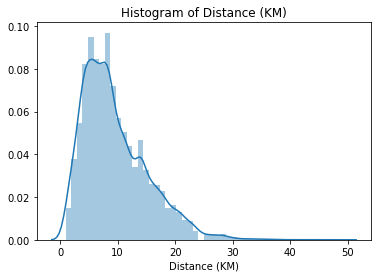

In [33]:
sns.distplot(sendy_data["Distance (KM)"])
plt.title("Histogram of Distance (KM)")
plt.show()

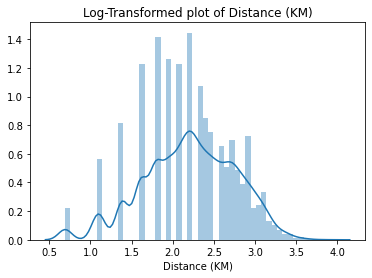

In [34]:
sendy_data["Distance (KM)"] = np.log1p(sendy_data["Distance (KM)"])
sns.distplot(sendy_data["Distance (KM)"])
plt.title("Log-Transformed plot of Distance (KM)")
plt.savefig("hist_trans.png")
plt.show()

In [35]:
# Create feature interest
loan_prev["interest_elapsed"] = loan_prev["totaldue"] - loan_prev["loanamount"]

In [36]:
# Groupby customer id and calculate their total loans taken
loannumber_count = (
    loan_prev.groupby(by="customerid").agg(["count"])[["loannumber"]].reset_index()
)

# merge back to dataset on customer_id
loan_prev = loan_prev.merge(right=loannumber_count, how="left", on="customerid")

loan_prev.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16
systemloanid,301682320,301883808,301831714,301861541,301941754
loannumber,2,9,8,5,2
approveddate,2016-08-15 18:22:40.000000,2017-04-28 18:39:07.000000,2017-03-05 10:56:25.000000,2017-04-09 18:25:55.000000,2017-06-17 09:29:57.000000
creationdate,2016-08-15 17:22:32.000000,2017-04-28 17:38:53.000000,2017-03-05 09:56:19.000000,2017-04-09 17:25:42.000000,2017-06-17 08:29:50.000000
loanamount,10000,10000,20000,10000,10000
totaldue,13000,13000,23800,11500,11500
termdays,30,30,30,15,15
closeddate,2016-09-01 16:06:48.000000,2017-05-28 14:44:49.000000,2017-04-26 22:18:56.000000,2017-04-24 01:35:52.000000,2017-07-14 21:18:43.000000


In [37]:
# create feature speed in sendy dataset
sendy_data["speed"] = (
    sendy_data["Distance (KM)"] / sendy_data["Time from Pickup to Arrival"]
)
sendy_data.head().T

,0,1,2,3,4
Order No,Order_No_4211,Order_No_25375,Order_No_1899,Order_No_9336,Order_No_27883
User Id,User_Id_633,User_Id_2285,User_Id_265,User_Id_1402,User_Id_1737
Vehicle Type,Bike,Bike,Bike,Bike,Bike
Platform Type,3,3,3,3,1
Personal or Business,Business,Personal,Business,Business,Personal
Placement - Day of Month,9,12,30,15,13
Placement - Weekday (Mo = 1),5,5,2,5,1
Placement - Time,9:35:46 AM,11:16:16 AM,12:39:25 PM,9:25:34 AM,9:55:18 AM
Confirmation - Day of Month,9,12,30,15,13
Confirmation - Weekday (Mo = 1),5,5,2,5,1


### Polynomial (Cross) Features:

In [38]:
# Use Sklearn Polynomial Features
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
to_cross = ["loannumber", "totaldue", "termdays"]
crossed_feats = poly.fit_transform(loan_prev[to_cross].values)

# Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats)
loan_prev = pd.concat([loan_prev, crossed_feats], axis=1)

In [39]:
loan_prev.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
customerid,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a2a81a74ce8c05d014cfb32a0da1049,8a8588f35438fe12015444567666018e,8a85890754145ace015429211b513e16
systemloanid,301682320,301883808,301831714,301861541,301941754
loannumber,2,9,8,5,2
approveddate,2016-08-15 18:22:40.000000,2017-04-28 18:39:07.000000,2017-03-05 10:56:25.000000,2017-04-09 18:25:55.000000,2017-06-17 09:29:57.000000
creationdate,2016-08-15 17:22:32.000000,2017-04-28 17:38:53.000000,2017-03-05 09:56:19.000000,2017-04-09 17:25:42.000000,2017-06-17 08:29:50.000000
loanamount,10000,10000,20000,10000,10000
totaldue,13000,13000,23800,11500,11500
termdays,30,30,30,15,15
closeddate,2016-09-01 16:06:48.000000,2017-05-28 14:44:49.000000,2017-04-26 22:18:56.000000,2017-04-24 01:35:52.000000,2017-07-14 21:18:43.000000


### Normalization of Features

Normalization helps to change the values of numeric features to a common scale, without distorting differences in the range of values or losing information. Normalization is very important for distance based models like KNN and also helps speed up training in Neural Nets.

Some Normalization functions available in sklearn:

    StandardScaler: Standardize features by removing the mean and scaling to unit variance.
    RobustScaler: Scale features using statistics that are robust to outliers.
    MinMaxScaler: Normalize features by scaling each feature to a specified range (range depends on you!).

Note: You should never fit your scaler to the test/validation set. This can cause leakages. Also scalers in sklearn are not robust to missing values, that means you should always fill missing values before attempting to use the scalers.

In [40]:
# Use standard scaler
from sklearn.preprocessing import StandardScaler

feats = ["loannumber", "totaldue", "termdays"]
sc = StandardScaler()
sc_data = sc.fit_transform(loan_prev[feats])

In [41]:
sc_data

array([[-0.67377132, -0.62877649,  0.30213166],
       [ 1.48047238, -0.62877649,  0.30213166],
       [ 1.17272328,  0.40432506,  0.30213166],
       ...,
       [-0.05827312, -0.62877649,  0.30213166],
       [-0.98152042, -0.62877649,  0.30213166],
       [-0.67377132, -0.62877649,  0.30213166]])

In [42]:
# Use Robust scaler
from sklearn.preprocessing import RobustScaler

robsc = RobustScaler()
rb_data = robsc.fit_transform(loan_prev[feats])

In [43]:
rb_data

array([[-0.25      ,  0.        ,  0.        ],
       [ 1.5       ,  0.        ,  0.        ],
       [ 1.25      ,  0.83076923,  0.        ],
       ...,
       [ 0.25      ,  0.        ,  0.        ],
       [-0.5       ,  0.        ,  0.        ],
       [-0.25      ,  0.        ,  0.        ]])

In [44]:
# Use MinMaxScaler scaler

from sklearn.preprocessing import MinMaxScaler

minsc = MinMaxScaler(feature_range=(0, 2))
minmax_data = minsc.fit_transform(loan_prev[feats])

In [45]:
minmax_data

array([[0.08      , 0.29543697, 0.4       ],
       [0.64      , 0.29543697, 0.4       ],
       [0.56      , 0.6295437 , 0.4       ],
       ...,
       [0.24      , 0.29543697, 0.4       ],
       [0.        , 0.29543697, 0.4       ],
       [0.08      , 0.29543697, 0.4       ]])

### Working with Date/Time features

In [46]:
# First convert to pandas datetime format
loan_perf["approveddate"] = pd.to_datetime(loan_perf["approveddate"])
loan_perf["creationdate"] = pd.to_datetime(loan_perf["creationdate"])


loan_perf["date_elapsed_in_secs"] = (
    loan_perf["approveddate"] - loan_perf["creationdate"]
) / np.timedelta64(
    1, "s"
)  # can subtitute with [h,m,s]
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0


In [47]:
# First convert to pandas datetime format
loan_perf["approveddate"] = pd.to_datetime(loan_perf["approveddate"])

# use pandas built in functions
loan_perf["approved_day"] = loan_perf["approveddate"].dt.day
loan_perf["approved_week"] = loan_perf["approveddate"].dt.week
loan_perf["approved_hour"] = loan_perf["approveddate"].dt.hour

In [48]:
# Get night afternoon and evening


def map_hours(x):
    if x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
        return "morning"
    elif x in [13, 14, 15, 16]:
        return "afternoon"
    else:
        return "evening"


loan_perf["period_of_day"] = loan_perf["approved_hour"].map(map_hours)
loan_perf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag,date_elapsed_in_secs,approved_day,approved_week,approved_hour,period_of_day
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,0.201835,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,0,3609.0,25,30,8,morning
1,8a85886e54beabf90154c0a29ae757c0,301965204,0.249103,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,0,3623.0,5,27,17,evening
2,8a8588f35438fe12015444567666018e,301966580,0.162698,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,0,3606.0,6,27,14,afternoon
3,8a85890754145ace015429211b513e16,301999343,0.267164,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,0,3606.0,27,30,19,evening
4,8a858970548359cc0154883481981866,301962360,0.166667,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,0,3606.0,3,27,23,evening


### Working with Latitudes and Longitudes

In [49]:
# Manhattan distnace
def manhattan_distance(lat1, lng1, lat2, lng2):
    a = np.abs(lat2 - lat1)
    b = np.abs(lng1 - lng2)
    return a + b


sendy_data["distance_manhattan"] = manhattan_distance(
    sendy_data["Pickup Lat"].values,
    sendy_data["Pickup Long"].values,
    sendy_data["Destination Lat"].values,
    sendy_data["Destination Long"].values,
)
sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,distance_manhattan
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,20.4,8.030560,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,26.4,8.186094,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,23.0,7.861419,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,19.2,7.503464,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,15.4,7.725474,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143


In [50]:
# Haversine distance
def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h


sendy_data["distance_haversine"] = haversine_array(
    sendy_data["Pickup Lat"].values,
    sendy_data["Pickup Long"].values,
    sendy_data["Destination Lat"].values,
    sendy_data["Destination Long"].values,
)

sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,distance_manhattan,distance_haversine
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,8.030560,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978,1.930333
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,8.186094,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406,11.339849
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,7.861419,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588,1.880079
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,7.503464,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487,4.943458
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,7.725474,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143,3.724829


In [51]:
# Bearing
def bearing_array(lat1, lng1, lat2, lng2):
    AVG_EARTH_RADIUS = 6371  # in km
    lng_delta_rad = np.radians(lng2 - lng1)
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(
        lng_delta_rad
    )
    return np.degrees(np.arctan2(y, x))


sendy_data["bearing"] = bearing_array(
    sendy_data["Pickup Lat"].values,
    sendy_data["Pickup Long"].values,
    sendy_data["Destination Lat"].values,
    sendy_data["Destination Long"].values,
)

sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,distance_manhattan,distance_haversine,bearing
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978,1.930333,-2.076903
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406,11.339849,-56.392163
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.308284,36.843419,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588,1.880079,-64.183866
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.281301,36.832396,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487,4.943458,-57.091553
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.266597,36.792118,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143,3.724829,148.114398


In [52]:
# Get center of lat and longitude
sendy_data["center_latitude"] = (
    sendy_data["Pickup Lat"].values + sendy_data["Destination Lat"].values
) / 2
sendy_data["center_longitude"] = (
    sendy_data["Pickup Long"].values + sendy_data["Destination Long"].values
) / 2
sendy_data.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,speed,distance_manhattan,distance_haversine,bearing,center_latitude,center_longitude
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.300406,36.829741,Rider_Id_432,745.0,0.002160,0.017978,1.930333,-2.076903,-1.309080,36.830056
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,...,-1.295004,36.814358,Rider_Id_856,1993.0,0.001422,0.141406,11.339849,-56.392163,-1.323229,36.856837
2,Order_No_1899,User_Id_265,Bike,3,Business,30,2,12:39:25 PM,30,2,...,-1.300921,36.828195,Rider_Id_155,455.0,0.003047,0.022588,1.880079,-64.183866,-1.304603,36.835807
3,Order_No_9336,User_Id_1402,Bike,3,Business,15,5,9:25:34 AM,15,5,...,-1.257147,36.795063,Rider_Id_855,1341.0,0.001717,0.061487,4.943458,-57.091553,-1.269224,36.813730
4,Order_No_27883,User_Id_1737,Bike,1,Personal,13,1,9:55:18 AM,13,1,...,-1.295041,36.809817,Rider_Id_770,1214.0,0.001897,0.046143,3.724829,148.114398,-1.280819,36.800968


## Example 3 Automated Feature Tools

### Data creation

In [55]:
import pandas as pd
import numpy as np

from datetime import datetime
import random

rand_dates = []

for _ in range(1000):

    year = random.choice(range(2000, 2015))
    month = random.choice(range(1, 13))
    day = random.choice(range(1, 29))
    rdate = datetime(year, month, day)
    rand_dates.append(rdate)

In [56]:
clients = pd.DataFrame(columns=["client_id", "joined", "income", "credit_score"])
for _ in range(25):
    clients = clients.append(
        pd.DataFrame(
            {
                "client_id": np.random.randint(25000, 50000, size=1)[0],
                "joined": random.choice(rand_dates),
                "income": np.random.randint(30500, 240000, size=1)[0],
                "credit_score": np.random.randint(500, 850, size=1)[0],
            },
            index=[0],
        ),
        ignore_index=True,
    )

clients.head()

,client_id,joined,income,credit_score
0,31401,2007-12-14,96450,657
1,35172,2002-07-06,118213,641
2,25027,2003-11-25,105857,736
3,47076,2006-08-05,168491,822
4,39003,2009-04-11,72072,519


In [57]:
loans = pd.DataFrame(
    columns=[
        "client_id",
        "loan_type",
        "loan_amount",
        "repaid",
        "loan_id",
        "loan_start",
        "loan_end",
        "rate",
    ]
)

for client in clients["client_id"].unique():
    for _ in range(20):
        time_created = pd.datetime(
            np.random.randint(2000, 2015, size=1)[0],
            np.random.randint(1, 13, size=1)[0],
            np.random.randint(1, 30, size=1)[0],
        )

        time_ended = time_created + pd.Timedelta(
            days=np.random.randint(500, 1000, size=1)[0]
        )

        loans = loans.append(
            pd.DataFrame(
                {
                    "client_id": client,
                    "loan_type": random.choice(["cash", "credit", "home", "other"]),
                    "loan_amount": np.random.randint(500, 15000, size=1)[0],
                    "repaid": random.choice([0, 1]),
                    "loan_id": np.random.randint(10000, 12000, size=1)[0],
                    "loan_start": time_created,
                    "loan_end": time_ended,
                    "rate": round(abs(4 * np.random.randn(1)[0]), 2),
                },
                index=[0],
            ),
            ignore_index=True,
        )

In [58]:
loans.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,31401,cash,3050,1,11577,2005-05-24,2006-11-02,1.67
1,31401,credit,5653,1,11630,2007-02-23,2009-10-11,9.65
2,31401,cash,4473,1,10531,2014-12-03,2016-05-31,9.31
3,31401,home,10329,0,11956,2012-03-17,2014-09-26,8.44
4,31401,cash,11925,0,11550,2014-09-22,2017-01-26,2.56


In [59]:
payments = pd.DataFrame(columns=["loan_id", "payment_amount", "payment_date", "missed"])

for _, row in loans.iterrows():
    time_created = row["loan_start"]
    payment_date = time_created + pd.Timedelta(days=30)
    loan_amount = row["loan_amount"]
    loan_id = row["loan_id"]
    payment_id = np.random.randint(10000, 12000, size=1)[0]
    for _ in range(np.random.randint(5, 10, size=1)[0]):
        payment_id += 1
        payment_date += pd.Timedelta(days=np.random.randint(10, 50, size=1)[0])
        payments = payments.append(
            pd.DataFrame(
                {
                    "loan_id": loan_id,
                    "payment_amount": np.random.randint(
                        int(loan_amount / 10), int(loan_amount / 5), size=1
                    )[0],
                    "payment_date": payment_date,
                    "missed": random.choice([0, 1]),
                },
                index=[0],
            ),
            ignore_index=True,
        )

In [60]:
payments.head()

,loan_id,payment_amount,payment_date,missed
0,11577,332,2005-07-30,0
1,11577,507,2005-09-13,1
2,11577,441,2005-09-26,1
3,11577,539,2005-10-17,1
4,11577,522,2005-11-17,0


In [62]:
clients = clients.drop_duplicates(subset="client_id")
loans = loans.drop_duplicates(subset="loan_id")


clients.to_csv("clients.csv", index=False)
loans.to_csv("loans.csv", index=False)
payments.to_csv("payments.csv", index=False)

### Automated Feature Engineering

In [63]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# featuretools for automated feature engineering
import featuretools as ft

# ignore warnings from pandas
import warnings

warnings.filterwarnings("ignore")

In [64]:
# Read in the data
clients = pd.read_csv("clients.csv", parse_dates=["joined"])
loans = pd.read_csv("loans.csv", parse_dates=["loan_start", "loan_end"])
payments = pd.read_csv("payments.csv", parse_dates=["payment_date"])

In [65]:
clients.head()

,client_id,joined,income,credit_score
0,31401,2007-12-14,96450,657
1,35172,2002-07-06,118213,641
2,25027,2003-11-25,105857,736
3,47076,2006-08-05,168491,822
4,39003,2009-04-11,72072,519


In [66]:
loans.sample(10)

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
273,49106,other,3187,0,11003,2009-06-25,2011-09-03,1.06
303,27956,home,6117,0,11991,2011-04-25,2013-02-27,7.25
295,34593,home,2778,1,10887,2008-05-25,2010-03-07,6.02
202,31940,credit,2032,0,11922,2002-11-24,2005-03-20,4.76
154,40685,home,2906,1,10842,2001-12-20,2003-07-07,1.94
58,25027,home,3570,0,11920,2001-07-06,2004-02-27,3.20
87,39003,home,6042,1,11590,2010-09-04,2013-03-11,6.17
246,28535,credit,13744,0,10636,2003-07-18,2005-04-29,4.00
387,39013,other,2730,0,11789,2006-12-15,2008-12-26,3.22
174,30805,cash,11862,1,10078,2002-10-10,2004-06-21,2.60


In [67]:
payments.sample(10)

,loan_id,payment_amount,payment_date,missed
1644,10486,162,2014-02-08,0
212,10587,948,2012-09-18,1
2734,10997,1193,2003-08-02,1
1375,11389,1148,2004-11-01,1
2303,11455,274,2007-12-16,0
2825,11693,1194,2011-09-30,0
286,11254,641,2005-06-08,0
1020,11315,655,2007-07-08,1
3317,10565,316,2000-12-01,1
1049,11129,417,2015-09-12,1


#### Manual Feature Engineering Examples

In [68]:
# Create a month column
clients["join_month"] = clients["joined"].dt.month

# Create a log of income column
clients["log_income"] = np.log(clients["income"])

clients.head()

,client_id,joined,income,credit_score,join_month,log_income
0,31401,2007-12-14,96450,657,12,11.476780
1,35172,2002-07-06,118213,641,7,11.680243
2,25027,2003-11-25,105857,736,11,11.569844
3,47076,2006-08-05,168491,822,8,12.034638
4,39003,2009-04-11,72072,519,4,11.185421


In [69]:
# Groupby client id and calculate mean, max, min previous loan size
stats = loans.groupby("client_id")["loan_amount"].agg(["mean", "max", "min"])
stats.columns = ["mean_loan_amount", "max_loan_amount", "min_loan_amount"]
stats.head()

,mean_loan_amount,max_loan_amount,min_loan_amount
client_id,,,
25027,8784.700000,14958,2609
26051,8412.421053,14383,744
27956,7432.066667,14392,924
28535,7416.157895,13902,1396
28936,6204.388889,13918,837


In [70]:
# Merge with the clients dataframe
clients.merge(stats, left_on="client_id", right_index=True, how="left").head(10)

,client_id,joined,income,credit_score,join_month,log_income,mean_loan_amount,max_loan_amount,min_loan_amount
0,31401,2007-12-14,96450,657,12,11.476780,9343.500000,14810,3050
1,35172,2002-07-06,118213,641,7,11.680243,8795.900000,14004,911
2,25027,2003-11-25,105857,736,11,11.569844,8784.700000,14958,2609
3,47076,2006-08-05,168491,822,8,12.034638,8279.526316,14998,1071
4,39003,2009-04-11,72072,519,4,11.185421,9234.526316,14909,797
5,30669,2011-08-27,33942,726,8,10.432408,6684.333333,14520,772
6,35199,2003-07-02,92263,716,7,11.432398,7728.947368,13648,1135
7,32835,2006-03-21,197902,608,3,12.195527,7226.000000,14785,2115
8,40685,2007-09-24,67591,644,9,11.121230,7946.411765,14556,629
9,30805,2005-03-13,171176,717,3,12.050448,7393.526316,14766,1578


### Featuretools

### EntitySet

In [71]:
es = ft.EntitySet(id="clients")

### Entities

In [72]:
# Create an entity from the client dataframe
# This dataframe already has an index and a time index
es = es.entity_from_dataframe(
    entity_id="clients", dataframe=clients, index="client_id", time_index="joined"
)

In [73]:
# Create an entity from the loans dataframe
# This dataframe already has an index and a time index
es = es.entity_from_dataframe(
    entity_id="loans",
    dataframe=loans,
    variable_types={"repaid": ft.variable_types.Categorical},
    index="loan_id",
    time_index="loan_start",
)

In [74]:
# Create an entity from the payments dataframe
# This does not yet have a unique index
es = es.entity_from_dataframe(
    entity_id="payments",
    dataframe=payments,
    variable_types={"missed": ft.variable_types.Categorical},
    make_index=True,
    index="payment_id",
    time_index="payment_date",
)

In [75]:
es

Entityset: clients
  Entities:
    clients [Rows: 25, Columns: 6]
    loans [Rows: 447, Columns: 8]
    payments [Rows: 3502, Columns: 5]
  Relationships:
    No relationships

In [76]:
es["loans"]

Entity: loans
  Variables:
    loan_id (dtype: index)
    client_id (dtype: numeric)
    loan_type (dtype: categorical)
    loan_amount (dtype: numeric)
    loan_start (dtype: datetime_time_index)
    loan_end (dtype: datetime)
    rate (dtype: numeric)
    repaid (dtype: categorical)
  Shape:
    (Rows: 447, Columns: 8)

In [77]:
es["payments"]

Entity: payments
  Variables:
    payment_id (dtype: index)
    loan_id (dtype: numeric)
    payment_amount (dtype: numeric)
    payment_date (dtype: datetime_time_index)
    missed (dtype: categorical)
  Shape:
    (Rows: 3502, Columns: 5)

### Relationships

In [78]:
# Relationship between clients and previous loans
r_client_previous = ft.Relationship(
    es["clients"]["client_id"], es["loans"]["client_id"]
)

# Add the relationship to the entity set
es = es.add_relationship(r_client_previous)

In [79]:
# Relationship between previous loans and previous payments
r_payments = ft.Relationship(es["loans"]["loan_id"], es["payments"]["loan_id"])

# Add the relationship to the entity set
es = es.add_relationship(r_payments)

es

Entityset: clients
  Entities:
    clients [Rows: 25, Columns: 6]
    loans [Rows: 447, Columns: 8]
    payments [Rows: 3502, Columns: 5]
  Relationships:
    loans.client_id -> clients.client_id
    payments.loan_id -> loans.loan_id

# Feature Primitives

In [80]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives["type"] == "aggregation"].head(10)

,name,type,description
0,num_true,aggregation,Counts the number of `True` values.
1,last,aggregation,Determines the last value in a list.
2,skew,aggregation,Computes the extent to which a distribution differs from a normal distribution.
3,count,aggregation,"Determines the total number of values, excluding `NaN`."
4,avg_time_between,aggregation,Computes the average number of seconds between consecutive events.
5,median,aggregation,Determines the middlemost number in a list of values.
6,min,aggregation,"Calculates the smallest value, ignoring `NaN` values."
7,mode,aggregation,Determines the most commonly repeated value.
8,num_unique,aggregation,"Determines the number of distinct values, ignoring `NaN` values."
9,n_most_common,aggregation,Determines the `n` most common elements.


In [81]:
primitives[primitives["type"] == "transform"].head(10)

,name,type,description
22,time_since,transform,Calculates time from a value to a specified cutoff datetime.
23,greater_than_scalar,transform,Determines if values are greater than a given scalar.
24,longitude,transform,Returns the second tuple value in a list of LatLong tuples.
25,divide_numeric_scalar,transform,Divide each element in the list by a scalar.
26,modulo_numeric_scalar,transform,Return the modulo of each element in the list by a scalar.
27,cum_max,transform,Calculates the cumulative maximum.
28,diff,transform,Compute the difference between the value in a list and the
29,is_weekend,transform,Determines if a date falls on a weekend.
30,cum_mean,transform,Calculates the cumulative mean.
31,latitude,transform,Returns the first tuple value in a list of LatLong tuples.


In [84]:
# Create new features using specified primitives
features, feature_names = ft.dfs(
    entityset=es,
    target_entity="clients",
    agg_primitives=["mean", "max", "percent_true", "last"],
)

In [85]:
pd.DataFrame(features["MONTH(joined)"].head())

,MONTH(joined)
client_id,
36701,3
42856,7
36547,9
33979,3
35172,7


In [86]:
pd.DataFrame(features["MEAN(payments.payment_amount)"].head())

,MEAN(payments.payment_amount)
client_id,
36701,1305.211382
42856,971.124031
36547,1226.978947
33979,1271.153226
35172,1274.023669


In [87]:
features.head()

,income,credit_score,join_month,log_income,MEAN(loans.rate),MEAN(loans.loan_amount),MAX(loans.rate),MAX(loans.loan_amount),LAST(loans.rate),LAST(loans.repaid),...,DAY(LAST(loans.loan_end)),YEAR(LAST(loans.loan_start)),YEAR(LAST(payments.payment_date)),YEAR(LAST(loans.loan_end)),MONTH(LAST(loans.loan_start)),MONTH(LAST(payments.payment_date)),MONTH(LAST(loans.loan_end)),WEEKDAY(LAST(loans.loan_start)),WEEKDAY(LAST(payments.payment_date)),WEEKDAY(LAST(loans.loan_end))
client_id,,,,,,,,,,,,,,,,,,,,,
36701,115859,623,3,11.660129,3.773529,8806.588235,7.27,14471,6.60,0,...,27,2013,2014,2015,7,1,8,1,4,3
42856,93908,528,7,11.450071,2.231765,6507.411765,6.59,14151,2.13,1,...,18,2014,2015,2016,9,2,11,3,0,4
36547,238163,804,9,12.380711,2.496154,8377.538462,4.91,14700,1.50,1,...,30,2013,2014,2015,10,2,11,3,2,0
33979,108758,696,3,11.596881,3.375294,8891.764706,8.62,14079,2.52,1,...,22,2014,2015,2016,6,3,5,4,1,6
35172,118213,641,7,11.680243,3.020000,8795.900000,10.46,14004,3.35,0,...,5,2013,2013,2015,2,11,7,6,0,6


### Deep Feature Synthesis

In [88]:
# Show a feature with a depth of 1
pd.DataFrame(features["MEAN(loans.loan_amount)"].head(10))

,MEAN(loans.loan_amount)
client_id,
36701,8806.588235
42856,6507.411765
36547,8377.538462
33979,8891.764706
35172,8795.900000
34593,8192.500000
29836,7678.500000
35199,7728.947368
25027,8784.700000


In [89]:
# Show a feature with a depth of 2
pd.DataFrame(features["LAST(loans.MEAN(payments.payment_amount))"].head(10))

,LAST(loans.MEAN(payments.payment_amount))
client_id,
36701,2006.400000
42856,1421.200000
36547,1287.000000
33979,436.500000
35172,557.642857
34593,2031.000000
29836,1240.625000
35199,825.400000
25027,1859.875000


### Automated Deep Feature Synthesis

In [90]:
# Perform deep feature synthesis without specifying primitives
features, feature_names = ft.dfs(entityset=es, target_entity="clients", max_depth=2)

In [91]:
features.iloc[:, 4:].head()

,SUM(loans.rate),SUM(loans.loan_amount),STD(loans.rate),STD(loans.loan_amount),MAX(loans.rate),MAX(loans.loan_amount),SKEW(loans.rate),SKEW(loans.loan_amount),MIN(loans.rate),MIN(loans.loan_amount),...,MIN(payments.loans.loan_amount),MIN(payments.loans.rate),MEAN(payments.loans.loan_amount),MEAN(payments.loans.rate),NUM_UNIQUE(payments.loans.repaid),NUM_UNIQUE(payments.loans.client_id),NUM_UNIQUE(payments.loans.loan_type),MODE(payments.loans.repaid),MODE(payments.loans.client_id),MODE(payments.loans.loan_type)
client_id,,,,,,,,,,,,,,,,,,,,,
36701,64.15,149712,2.235238,4029.562229,7.27,14471,-0.205539,-0.222669,0.19,1689,...,1689,0.19,9201.886179,3.431707,2,1,4,1,36701,cash
42856,37.94,110626,1.704271,4248.837518,6.59,14151,1.168515,0.107882,0.30,588,...,588,0.30,6577.271318,2.136822,2,1,4,1,42856,home
36547,32.45,108908,1.492328,4080.139042,4.91,14700,0.508857,0.121068,0.33,1779,...,1779,0.33,8310.600000,2.408947,2,1,4,1,36547,other
33979,57.38,151160,2.788802,4628.182574,8.62,14079,0.690351,-0.506512,0.12,828,...,828,0.12,8663.209677,3.475565,2,1,4,0,33979,cash
35172,60.40,175918,2.613896,4437.832613,10.46,14004,1.236064,-0.534144,0.15,911,...,911,0.15,8810.828402,2.749527,2,1,4,1,35172,credit
